In [1]:
# Importing Liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing Data

df = pd.read_excel(r"Covid_Dataset.xlsx", header=0)
df.head(5)

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,Yes,female,Contact with confirmed,positive
1,1,0,0,0,0,Yes,male,Contact with confirmed,positive
2,0,0,0,0,0,Yes,male,Abroad,positive
3,1,1,0,0,0,Yes,male,Other,positive
4,1,1,0,0,0,Yes,female,Contact with confirmed,positive


In [3]:
df1 = pd.read_excel(r"Test_file.xlsx", header=0)
df1.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,0,0,0,0,0,Yes,male,Other
1,0,0,0,0,0,Yes,female,Other
2,0,0,0,0,0,Yes,male,Other
3,0,0,0,0,0,Yes,male,Contact with confirmed
4,1,0,0,0,0,Yes,male,Contact with confirmed


### Preprocessing the data

In [4]:
df.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
age_60_and_above       object
gender                 object
test_indication        object
corona_result          object
dtype: object

In [5]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,0.419747,0.273280,0.038372,0.037436,0.058493
std,0.493633,0.445748,0.192137,0.189871,0.234729
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_60_and_above       0
gender                 0
test_indication        0
corona_result          0
dtype: int64

In [7]:
df.nunique()

cough                  2
fever                  2
sore_throat            2
shortness_of_breath    2
head_ache              2
age_60_and_above       2
gender                 3
test_indication        3
corona_result          2
dtype: int64

In [8]:
for i in df.columns:
    print({i:df[i].unique()})

{'cough': array([0, 1], dtype=int64)}
{'fever': array([0, 1], dtype=int64)}
{'sore_throat': array([0, 1], dtype=int64)}
{'shortness_of_breath': array([0, 1], dtype=int64)}
{'head_ache': array([0, 1], dtype=int64)}
{'age_60_and_above': array(['Yes', 'No'], dtype=object)}
{'gender': array(['female', 'male', 'None'], dtype=object)}
{'test_indication': array(['Contact with confirmed', 'Abroad', 'Other'], dtype=object)}
{'corona_result': array(['positive', 'negative'], dtype=object)}


In [9]:
df["corona_result"].value_counts()

positive    1105
negative    1032
Name: corona_result, dtype: int64

### Data Visualisation

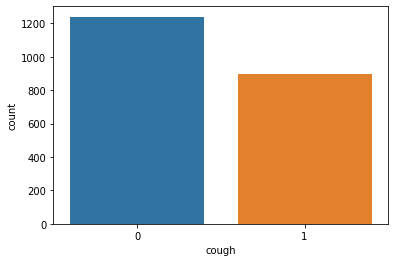

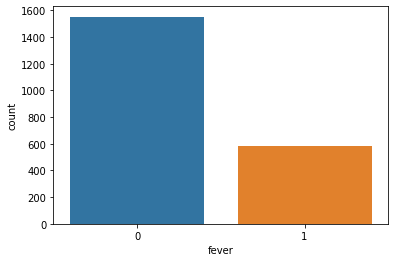

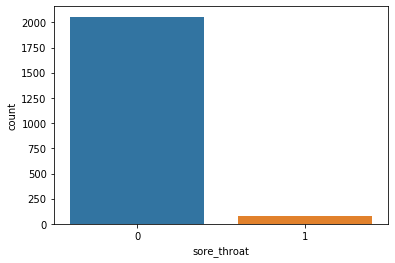

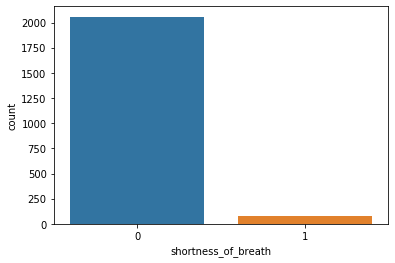

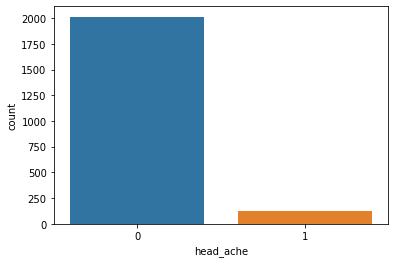

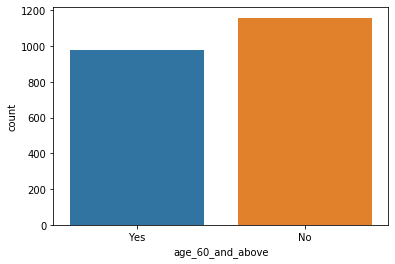

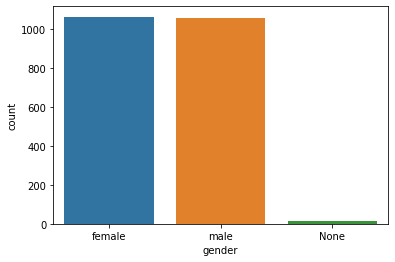

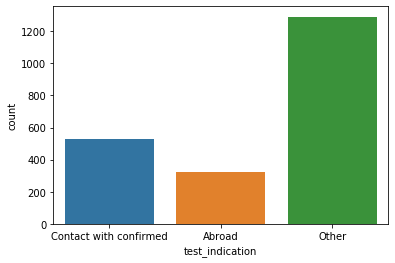

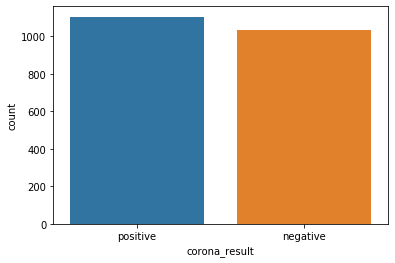

In [10]:
for i in df.columns:
    sns.countplot(x=i, data=df)
    plt.show()

In [11]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication', 'corona_result'],
      dtype='object')

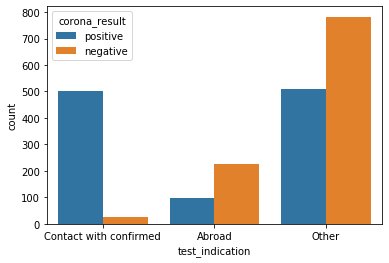

In [12]:
sns.countplot(x='test_indication', hue='corona_result', data=df, dodge=True)
plt.show()

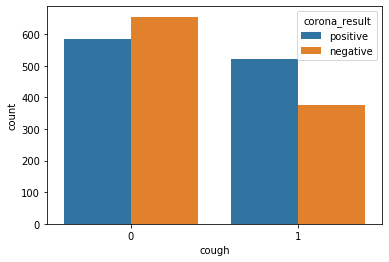

In [13]:
sns.countplot(x='cough', hue='corona_result', data=df)
plt.show()

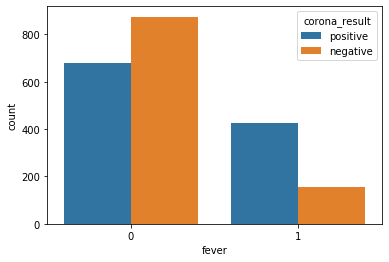

In [14]:
sns.countplot(x='fever', hue='corona_result', data=df)
plt.show()

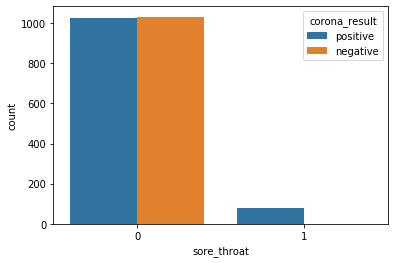

In [15]:
sns.countplot(x='sore_throat', hue='corona_result', data=df)
plt.show()

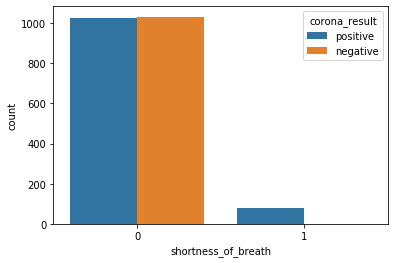

In [16]:
sns.countplot(x='shortness_of_breath', hue='corona_result', data=df)
plt.show()

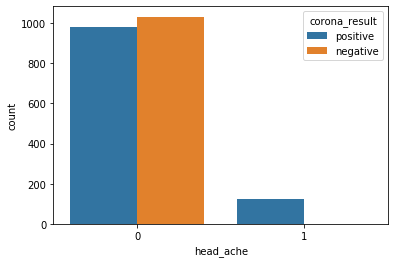

In [17]:
sns.countplot(x='head_ache', hue='corona_result', data=df)
plt.show()


#### Converting the categorical columns in numbers using LabelEncoder

In [18]:
Cat_col=[]

for i in df.columns:
    if df[i].dtype == "object":
        Cat_col.append(i)

In [19]:
Cat_col

['age_60_and_above', 'gender', 'test_indication', 'corona_result']

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in Cat_col:
    df[i]=le.fit_transform(df[i])

In [21]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,1,1,1,1
1,1,0,0,0,0,1,2,1,1
2,0,0,0,0,0,1,2,0,1
3,1,1,0,0,0,1,2,2,1
4,1,1,0,0,0,1,1,1,1


#### Converting the categorical columns in numbers using LabelEncoder

In [22]:
Cat_col=[]

for i in df1.columns:
    if df1[i].dtype == "object":
        Cat_col.append(i)

In [23]:
Cat_col

['age_60_and_above', 'gender', 'test_indication']

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in Cat_col:
    df1[i]=le.fit_transform(df1[i])

In [25]:
df1.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,0,0,0,0,0,1,2,2
1,0,0,0,0,0,1,1,2
2,0,0,0,0,0,1,2,2
3,0,0,0,0,0,1,2,1
4,1,0,0,0,0,1,2,1


#### Creating X and Y

In [26]:
X = df.values[:,0:-1]
Y = df.values[:,-1]
Y = Y.astype(int)

In [27]:
print(X.shape)
print(Y.shape)

(2137, 8)
(2137,)


#### Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[-0.85052166, -0.61322619, -0.19975654, ...,  1.08860993,
        -0.94662967, -0.61239078],
       [ 1.17574901, -0.61322619, -0.19975654, ...,  1.08860993,
         0.99664372, -0.61239078],
       [-0.85052166, -0.61322619, -0.19975654, ...,  1.08860993,
         0.99664372, -1.9629368 ],
       ...,
       [-0.85052166, -0.61322619, -0.19975654, ..., -0.91860268,
         0.99664372,  0.73815524],
       [-0.85052166, -0.61322619, -0.19975654, ..., -0.91860268,
         0.99664372,  0.73815524],
       [ 1.17574901, -0.61322619, -0.19975654, ..., -0.91860268,
        -0.94662967,  0.73815524]])

#### Splitting the data into train and test

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1495, 8)
(642, 8)
(1495,)
(642,)


### Running the Basic Decision tree model

In [31]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()

model_DT.fit(X_train, Y_train)

y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 

In [32]:
print(list(zip(Y_test,y_pred)))

[(1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (1, 0),

#### Evaluating the model

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[271  47]
 [ 98 226]]

0.7741433021806854

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       318
           1       0.83      0.70      0.76       324

    accuracy                           0.77       642
   macro avg       0.78      0.77      0.77       642
weighted avg       0.78      0.77      0.77       642



In [34]:
model_DT.score(X_train, Y_train)

0.8006688963210702

In [35]:
model_DT.feature_importances_

array([0.07088248, 0.14459215, 0.03157813, 0.01977187, 0.06716629,
       0.08298065, 0.04430876, 0.53871967])

In [36]:
print(list(zip(df.columns[0:-1],model_DT.feature_importances_)))

[('cough', 0.07088247705884082), ('fever', 0.1445921489994486), ('sore_throat', 0.03157813265737064), ('shortness_of_breath', 0.019771872290090323), ('head_ache', 0.06716629121317325), ('age_60_and_above', 0.08298064971584812), ('gender', 0.044308757246676204), ('test_indication', 0.5387196708185521)]


In [37]:
sample=pd.DataFrame()
 
sample["Column"]=df.columns[0:-1]
sample["Imp value"]=model_DT.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
7,test_indication,0.538720
1,fever,0.144592
5,age_60_and_above,0.082981
0,cough,0.070882
4,head_ache,0.067166
6,gender,0.044309
2,sore_throat,0.031578
3,shortness_of_breath,0.019772


### Pruning the Decision tree

In [38]:
# predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier

model_DecisionTree1 = DecisionTreeClassifier(random_state=10,
                                           criterion="gini",
                                           splitter="best",
                                           min_samples_leaf=2,
                                           min_samples_split=3,
                                           max_depth=10)

#min_samples_leaf, min_samples_split, max_dept, max_features ( Mostly used on Large number of variables), max_leaf_nodes

#fit the model on the data and predict the values
model_DecisionTree1.fit(X_train, Y_train)
Y_pred1 = model_DecisionTree1.predict(X_test)

print(Y_pred1)


[0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Confusion matrix
print(confusion_matrix(Y_test,Y_pred1))
print()
print(accuracy_score(Y_test,Y_pred1))
print()
print(classification_report(Y_test,Y_pred1))

[[270  48]
 [ 97 227]]

0.7741433021806854

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       318
           1       0.83      0.70      0.76       324

    accuracy                           0.77       642
   macro avg       0.78      0.77      0.77       642
weighted avg       0.78      0.77      0.77       642



### Building model using Logistic regression 

In [40]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred2=classifier.predict(X_test)
print(Y_pred2)

[0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred2)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred2))
 
acc=accuracy_score(Y_test, Y_pred2)
print("Accuracy of the model: ",acc)

[[237  81]
 [137 187]]
Classification report: 
              precision    recall  f1-score   support

           0       0.63      0.75      0.68       318
           1       0.70      0.58      0.63       324

    accuracy                           0.66       642
   macro avg       0.67      0.66      0.66       642
weighted avg       0.67      0.66      0.66       642

Accuracy of the model:  0.660436137071651


### Using SVC

In [42]:
from sklearn.svm import SVC
#create a model
svm= SVC(kernel="rbf", gamma=0.1, C=1,random_state=10)
#fitting training data to the model
svm.fit(X_train, Y_train)

Y_pred3=classifier.predict(X_test)
print(Y_pred3)

[0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred3)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred3))
 
acc=accuracy_score(Y_test, Y_pred3)
print("Accuracy of the model: ",acc)

[[237  81]
 [137 187]]
Classification report: 
              precision    recall  f1-score   support

           0       0.63      0.75      0.68       318
           1       0.70      0.58      0.63       324

    accuracy                           0.66       642
   macro avg       0.67      0.66      0.66       642
weighted avg       0.67      0.66      0.66       642

Accuracy of the model:  0.660436137071651


### Building multiple models at once

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
 
# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm= SVC(kernel="rbf", gamma=0.1, C=1,random_state=10)     # Suitable for lesser amt of data, this is base SVC model, Try tunning the model it will show better results eg consider C=90
logreg=LogisticRegression(multi_class="multinomial",random_state=10)
  

In [45]:
# now, create a list with the objects 
models= [tree, knn, svm, logreg]
  

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
for model in models:
    model.fit(X_train, Y_train) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[271  47]
 [ 98 226]]
The accuracy of the  DecisionTreeClassifier  model is  77.41433021806854
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       318
           1       0.83      0.70      0.76       324

    accuracy                           0.77       642
   macro avg       0.78      0.77      0.77       642
weighted avg       0.78      0.77      0.77       642



[[238  80]
 [ 79 245]]
The accuracy of the  KNeighborsClassifier  model is  75.23364485981308
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       318
           1       0.75      0.76      0.76       324

    accuracy                           0.75       642
   macro avg       0.75      0.75      0.75       642
weighted avg       0.75      0.75      0.75       642



[[293  25]
 [104 220]]
The accuracy of the  SVC  model is  79.90654205607477
Classification report:
    

##### Bagging Technique

### predicting using the Random_Forest_Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=100,
                                           random_state=10,
                                           bootstrap=True,
                                           n_jobs=-1)   # (n_jobs=-1)is a special value to indicate to all the CPu cores to get the job done on priority

#fit the model on the data and predict the values

model_RandomForest.fit(X_train, Y_train)    # this will take a long time to run as all the DT will get train Parallely 

Y_pred = model_RandomForest.predict(X_test)

print(Y_pred)


[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")

print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[268  50]
 [ 86 238]]

Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       318
           1       0.83      0.73      0.78       324

    accuracy                           0.79       642
   macro avg       0.79      0.79      0.79       642
weighted avg       0.79      0.79      0.79       642

Accuracy of the model:  0.7881619937694704


### predicting using the Extra_trees_Classifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier

model_EXT = ExtraTreesClassifier(n_estimators=100,
                                           random_state=10,
                                           bootstrap=True)

#fit the model on the data and predict the values

model_EXT.fit(X_train, Y_train)    # this will take a long time to run as all the DT will get train Parallely 

Y_pred = model_EXT.predict(X_test)

print(Y_pred)


[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")

print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[268  50]
 [ 86 238]]

Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       318
           1       0.83      0.73      0.78       324

    accuracy                           0.79       642
   macro avg       0.79      0.79      0.79       642
weighted avg       0.79      0.79      0.79       642

Accuracy of the model:  0.7881619937694704


> Conclusion:

>    1.From all of the above models build the Random Forest Classifier and Extra tree classifier models are working better          than the other models.They have an acccuracy of around 79%.

>    2.The base decision tree model is also quite good had an accuracy of 78% but has low precision and recall than Random          forest and Extra tree classifier

In [51]:
df1.shape

(658, 8)

In [52]:
test=df1.values
test=scaler.transform(test)
#print(test)

In [53]:
# Predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)

# fit the model on the data and predict the values

model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=10)

In [54]:
test_pred = model_DecisionTree.predict(test)
test_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=100,
                                           random_state=10,
                                           bootstrap=True,
                                           n_jobs=-1)   # (n_jobs=-1)is a special value to indicate to all the CPu cores to get the job done on priority

#fit the model on the data and predict the values

model_RandomForest.fit(X_train, Y_train)    # this will take a long time to run as all the DT will get train Parallely 

RandomForestClassifier(n_jobs=-1, random_state=10)

In [56]:
Y_pred = model_RandomForest.predict(test)

print(Y_pred)

[1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 1 1 0 0 0 1 0 1 0 0 0 

#### Dropping one least important variable and rerunning the DT and Random forest models and comparing teh accuracy

In [57]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,1,1,1,1
1,1,0,0,0,0,1,2,1,1
2,0,0,0,0,0,1,2,0,1
3,1,1,0,0,0,1,2,2,1
4,1,1,0,0,0,1,1,1,1


In [58]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'age_60_and_above', 'gender', 'test_indication', 'corona_result'],
      dtype='object')

In [59]:
df.drop("shortness_of_breath", axis=1, inplace=True)

In [60]:
df.head()

,cough,fever,sore_throat,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,1,1,1,1
1,1,0,0,0,1,2,1,1
2,0,0,0,0,1,2,0,1
3,1,1,0,0,1,2,2,1
4,1,1,0,0,1,1,1,1


#### Creating X and Y

In [61]:
X = df.values[:,0:-1]
Y = df.values[:,-1]
Y = Y.astype(int)

In [62]:
print(X.shape)
print(Y.shape)

(2137, 7)
(2137,)


#### Scaling the data

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X)

array([[-0.85052166, -0.61322619, -0.19975654, ...,  1.08860993,
        -0.94662967, -0.61239078],
       [ 1.17574901, -0.61322619, -0.19975654, ...,  1.08860993,
         0.99664372, -0.61239078],
       [-0.85052166, -0.61322619, -0.19975654, ...,  1.08860993,
         0.99664372, -1.9629368 ],
       ...,
       [-0.85052166, -0.61322619, -0.19975654, ..., -0.91860268,
         0.99664372,  0.73815524],
       [-0.85052166, -0.61322619, -0.19975654, ..., -0.91860268,
         0.99664372,  0.73815524],
       [ 1.17574901, -0.61322619, -0.19975654, ..., -0.91860268,
        -0.94662967,  0.73815524]])

#### Splitting the data into train and test

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1495, 7)
(642, 7)
(1495,)
(642,)


### Running the Basic Decision tree model

In [66]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()

model_DT.fit(X_train, Y_train)

y_pred = model_DT.predict(X_test)
print(y_pred)

[0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 

In [67]:
print(list(zip(Y_test,y_pred)))

[(1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (1, 0),

#### Evaluating the model

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[269  49]
 [ 93 231]]

0.778816199376947

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       318
           1       0.82      0.71      0.76       324

    accuracy                           0.78       642
   macro avg       0.78      0.78      0.78       642
weighted avg       0.78      0.78      0.78       642



### predicting using the Random_Forest_Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=100,
                                           random_state=10,
                                           bootstrap=True,
                                           n_jobs=-1)   # (n_jobs=-1)is a special value to indicate to all the CPu cores to get the job done on priority

#fit the model on the data and predict the values

model_RandomForest.fit(X_train, Y_train)    # this will take a long time to run as all the DT will get train Parallely 

Y_pred = model_RandomForest.predict(X_test)

print(Y_pred)


[0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classification report: ")

print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[265  53]
 [ 90 234]]

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       318
           1       0.82      0.72      0.77       324

    accuracy                           0.78       642
   macro avg       0.78      0.78      0.78       642
weighted avg       0.78      0.78      0.78       642

Accuracy of the model:  0.7772585669781932
